In [13]:
import os
import pandas as pd
from pydub import AudioSegment
from scipy.io import wavfile
from data_utils import Datainfo
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
dir = Datainfo["dir"]
pos = Datainfo["positives"]
neg = Datainfo["negatives"]
templates = Datainfo["backgrounds"]

In [15]:
def audioDF(dir, ext):
    fileList = [x for x in os.listdir(dir) if x.endswith(ext)]
    filePath = [os.path.join(dir, x) for x in fileList]
    df = pd.DataFrame({
        'files': fileList,
        'paths': filePath,
    })
    return df

In [16]:
def durAudio(filepath):
    rate, data = wavfile.read(filepath)
    return len(data)/rate

def return_dBFS(filepath):
    segment = AudioSegment.from_wav(filepath)
    return segment.dBFS

In [17]:
posData = audioDF(pos, "wav")
posData.head()

,files,paths
0,audio1.wav,e:\Prototype\WWmodule\Data\positives\audio1.wav
1,audio10.wav,e:\Prototype\WWmodule\Data\positives\audio10.wav
2,audio11.wav,e:\Prototype\WWmodule\Data\positives\audio11.wav
3,audio12.wav,e:\Prototype\WWmodule\Data\positives\audio12.wav
4,audio13.wav,e:\Prototype\WWmodule\Data\positives\audio13.wav


In [18]:
posData["durations"] = [durAudio(x) for x in posData["paths"]]
posData["dBFS"] = [return_dBFS(x) for x in posData["paths"]]
posData.head()

,files,paths,durations,dBFS
0,audio1.wav,e:\Prototype\WWmodule\Data\positives\audio1.wav,1.04,-13.998772
1,audio10.wav,e:\Prototype\WWmodule\Data\positives\audio10.wav,0.58,-14.000100
2,audio11.wav,e:\Prototype\WWmodule\Data\positives\audio11.wav,1.20,-14.132630
3,audio12.wav,e:\Prototype\WWmodule\Data\positives\audio12.wav,1.03,-14.340129
4,audio13.wav,e:\Prototype\WWmodule\Data\positives\audio13.wav,1.33,-13.998772


In [19]:
posData.describe()

,durations,dBFS
count,47.000000,47.000000
mean,0.879362,-14.030959
std,0.232345,0.070434
min,0.500000,-14.340129
25%,0.725000,-14.010735
50%,0.870000,-14.001429
75%,1.000000,-14.000100
max,1.420000,-13.998772


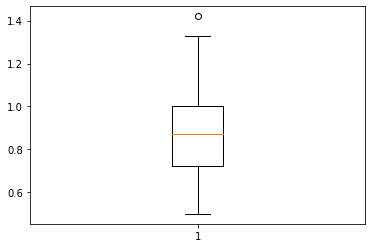

In [20]:
plt.boxplot(x=posData["durations"])
plt.show()

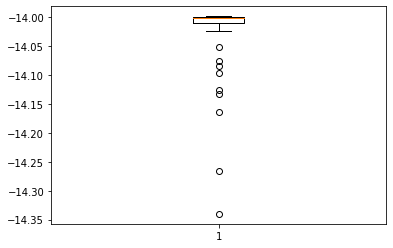

In [21]:
plt.boxplot(x=posData["dBFS"])
plt.show()

In [22]:
negData = audioDF(neg, "wav")
negData.head()

,files,paths
0,audio1.wav,e:\Prototype\WWmodule\Data\negatives\audio1.wav
1,audio10.wav,e:\Prototype\WWmodule\Data\negatives\audio10.wav
2,audio11.wav,e:\Prototype\WWmodule\Data\negatives\audio11.wav
3,audio12.wav,e:\Prototype\WWmodule\Data\negatives\audio12.wav
4,audio13.wav,e:\Prototype\WWmodule\Data\negatives\audio13.wav


In [23]:
negData["durations"] = [durAudio(x) for x in negData["paths"]]
negData["dBFS"] = [return_dBFS(x) for x in negData["paths"]]
negData.head()

,files,paths,durations,dBFS
0,audio1.wav,e:\Prototype\WWmodule\Data\negatives\audio1.wav,0.999938,-14.038713
1,audio10.wav,e:\Prototype\WWmodule\Data\negatives\audio10.wav,0.999938,-14.200341
2,audio11.wav,e:\Prototype\WWmodule\Data\negatives\audio11.wav,0.999938,-14.054741
3,audio12.wav,e:\Prototype\WWmodule\Data\negatives\audio12.wav,0.999938,-14.242588
4,audio13.wav,e:\Prototype\WWmodule\Data\negatives\audio13.wav,0.999938,-14.033377


In [24]:
negData.describe()

,durations,dBFS
count,57.000000,57.000000
mean,0.991143,-14.332902
std,0.034725,0.352827
min,0.810562,-15.566737
25%,0.999938,-14.424816
50%,0.999938,-14.242588
75%,0.999938,-14.068121
max,0.999938,-13.994788


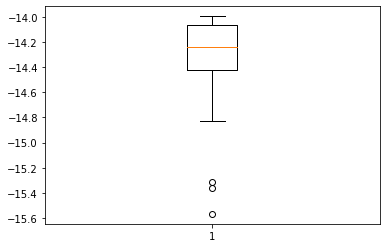

In [25]:
plt.boxplot(x=negData["dBFS"])
plt.show()